# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_df = pd.merge(mouse_metadata, study_results, how = 'outer', on= 'Mouse ID')

# Display the data table for preview
combine_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = combine_df['Mouse ID'].nunique()
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_miceID = combine_df[combine_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
dup_miceID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_miceID_df = combine_df.loc[combine_df['Mouse ID'] == 'g989', :]
dup_miceID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df[combine_df['Mouse ID'].isin(dup_miceID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()

clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Agg_method = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean', median='median', var='var', std='std', sem='sem')
Agg_method

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

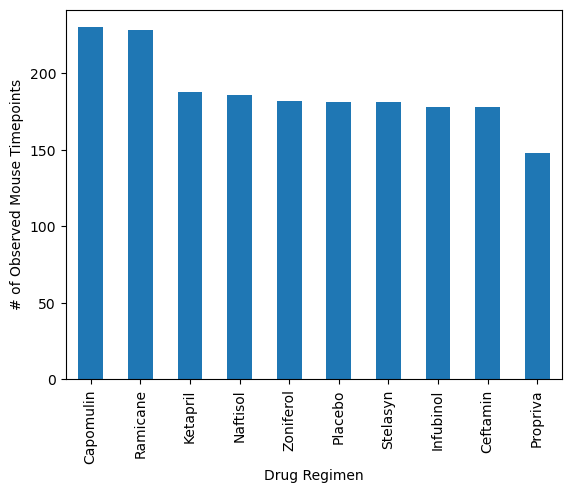

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Count_mice = clean_df["Drug Regimen"].value_counts()
plot_bar = Count_mice.plot.bar(color= '#1f77b4') 

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


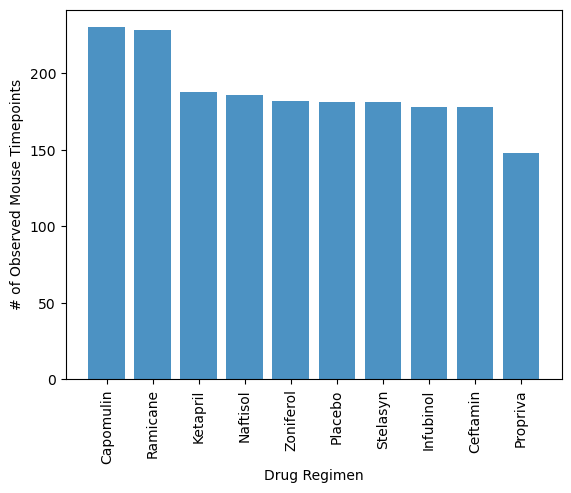

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = Count_mice.index.values
y_axis = Count_mice.values

plt.bar(x_axis, y_axis, color='#1f77b4', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

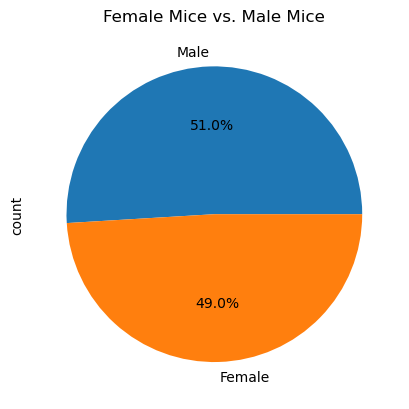

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts()
plt.title("Female Mice vs. Male Mice")
gender.plot.pie(autopct= "%1.1f%%")
plt.show()

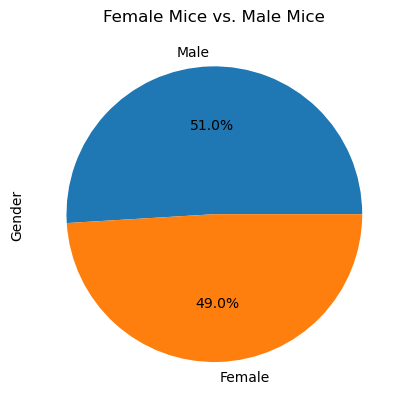

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Female Mice vs. Male Mice')
plt.ylabel('Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]


In [14]:

# Define treatment regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to store results
results = []

# Iterate through treatment regimens
for treatment in treatments:
    # Filter data for the current regimen
    regimen_df = clean_df.loc[clean_df["Drug Regimen"] == treatment]
    
    # Get the last (greatest) timepoint for each mouse
    last_timepoint = regimen_df.groupby('Mouse ID')['Timepoint'].max()
    
    # Merge with the original dataframe to get the final tumor volume
    merged_df = pd.merge(last_timepoint, clean_df, on=("Mouse ID", "Timepoint"), how="left")
    
    # Calculate quartiles and IQR
    quartiles = merged_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq, upperq = quartiles[0.25], quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound, upper_bound = lowerq - (1.5 * iqr), upperq + (1.5 * iqr)
    
    # Append results to the list
    results.append({
        "Regimen": treatment,
        "Lower Quartile": lowerq,
        "Upper Quartile": upperq,
        "Interquartile Range": iqr,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    })

# Display results
for result in results:
    print(f"\n{result['Regimen']} Regimen - Tumor Volume Summary:")
    print(f"Lower Quartile: {result['Lower Quartile']:.2f}")
    print(f"Upper Quartile: {result['Upper Quartile']:.2f}")
    print(f"Interquartile Range: {result['Interquartile Range']:.2f}")
    print(f"Lower Bound: {result['Lower Bound']:.2f}")
    print(f"Upper Bound: {result['Upper Bound']:.2f}")



Capomulin Regimen - Tumor Volume Summary:
Lower Quartile: 32.38
Upper Quartile: 40.16
Interquartile Range: 7.78
Lower Bound: 20.70
Upper Bound: 51.83

Ramicane Regimen - Tumor Volume Summary:
Lower Quartile: 31.56
Upper Quartile: 40.66
Interquartile Range: 9.10
Lower Bound: 17.91
Upper Bound: 54.31

Infubinol Regimen - Tumor Volume Summary:
Lower Quartile: 54.05
Upper Quartile: 65.53
Interquartile Range: 11.48
Lower Bound: 36.83
Upper Bound: 82.74

Ceftamin Regimen - Tumor Volume Summary:
Lower Quartile: 48.72
Upper Quartile: 64.30
Interquartile Range: 15.58
Lower Bound: 25.36
Upper Bound: 87.67


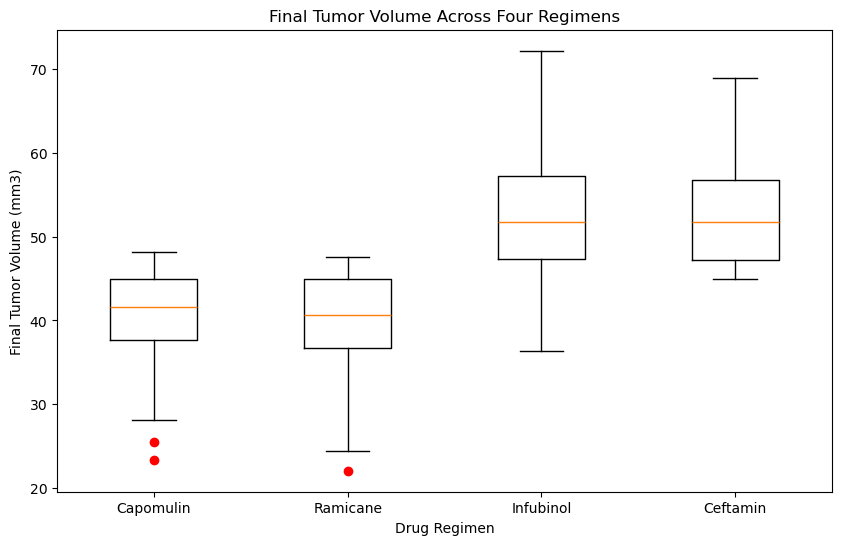

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Define the regimens of interest
regimens_of_interest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the data for the specified regimens
final_tumor_volume_df = clean_df[clean_df["Drug Regimen"].isin(regimens_of_interest)]

# Create a dictionary to store data for each regimen
data_dict = {regimen: final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == regimen]["Tumor Volume (mm3)"].values
             for regimen in regimens_of_interest}

# Create a box plot using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(data_dict.values(), labels=data_dict.keys(), sym="ro")

# Customize the plot
plt.title("Final Tumor Volume Across Four Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

# Show the plot
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

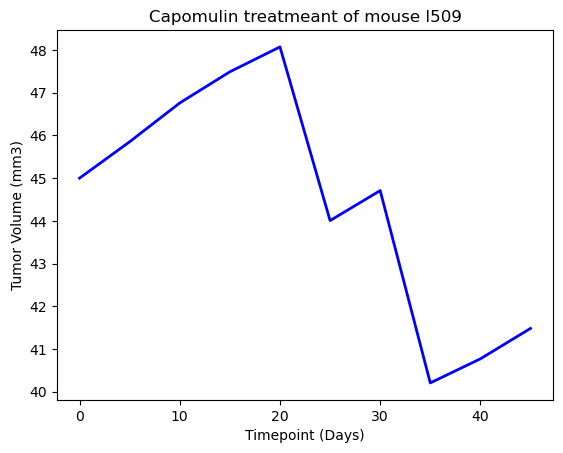

In [16]:

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
lineplot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
lineplot_df.head()
x_axis = lineplot_df["Timepoint"]
tumsiz = lineplot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

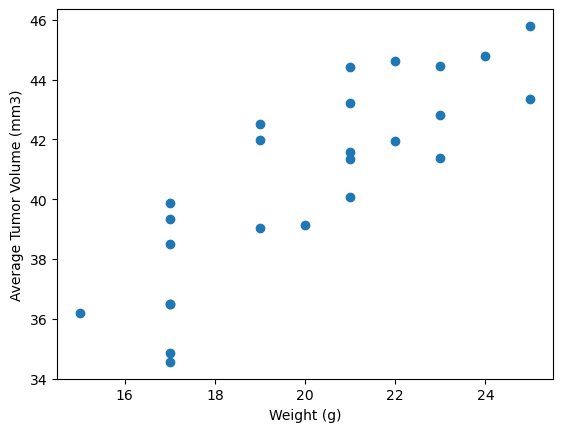

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = combine_df.loc[combine_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


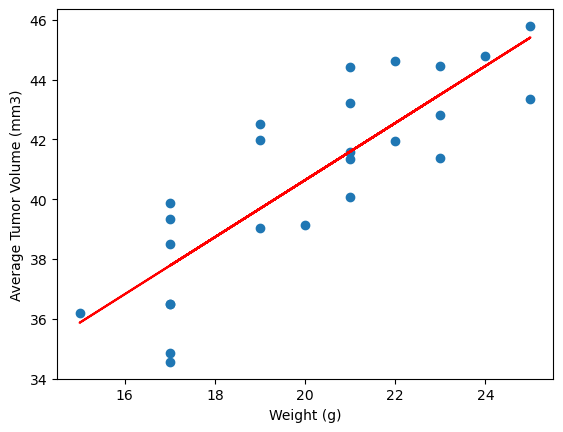

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()